## Logistic Regression Lab - Titanic Survival Prediction

This workbook is to analyze the data about Titanic survivors information, and use and evaluate logistic regression model which is applying on the dataset.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

train = pd.read_csv('E:\Sebnewrepo\Leo Study\week5/train.csv')
test1 = pd.read_csv('E:\Sebnewrepo\Leo Study\week5/test.csv')
test = test1

### 01. Data Exploration

In [2]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# see the summary of the data

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
# see the missing value
print('missing value on train set')
print(train.isnull().sum())
print("-" * 40)
print('missing value on test set')
print(test.isnull().sum())

missing value on train set
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
missing value on test set
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### 01.1 Embarking Place

Where the passengers embarked? (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


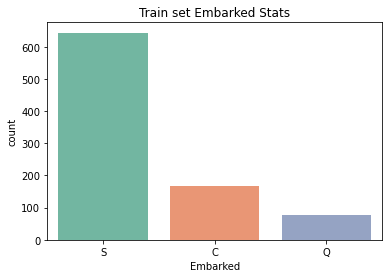

In [6]:
print('Where the passengers embarked? (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train['Embarked'].value_counts())
plt.title('Train set Embarked Stats')
sns.countplot(x='Embarked', data=train, palette='Set2')
plt.show()

C = Cherbourg, Q = Queenstown, S = Southampton


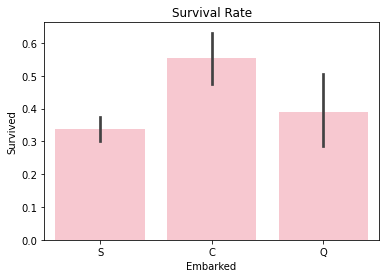

In [7]:
print('C = Cherbourg, Q = Queenstown, S = Southampton')
plt.title('Survival Rate')
sns.barplot('Embarked', 'Survived', data=train, color='pink')
plt.show()

#### 01.2  Survival Rate with Sex

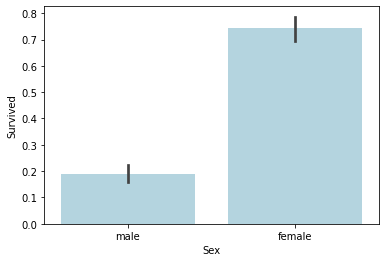

In [8]:
sns.barplot('Sex', 'Survived', data = train, color="lightblue")
plt.show()

#### 01.3  Survival Rate with Ticket Price

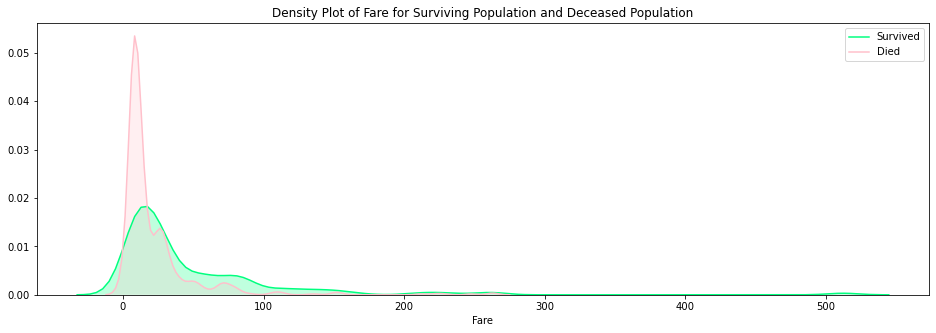

In [9]:
plt.figure(figsize=(16,5))
ax = sns.kdeplot(train["Fare"][train.Survived == 1], color = "springgreen", shade = True)
sns.kdeplot(train["Fare"][train.Survived == 0], color = "pink", shade = True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel = 'Fare')
plt.show()

#### 01.4 Survival Rate with Age

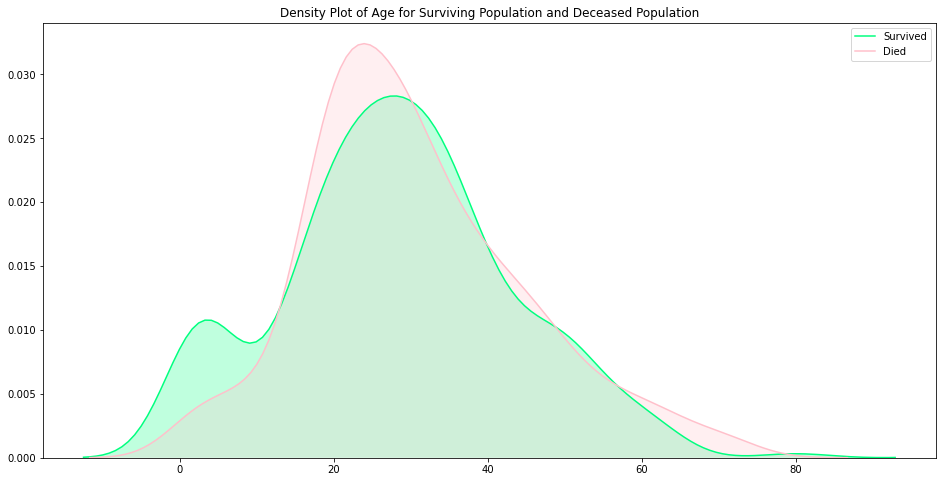

In [10]:
plt.figure(figsize=(16,8))
sns.kdeplot(train["Age"][train.Survived == 1], color="springgreen", shade = True)
sns.kdeplot(train["Age"][train.Survived == 0], color = "pink", shade = True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel = 'Age')
plt.show()

### 02. Deal with missing value in Age column

In [11]:
# replacing missing Age value with the mean age of same Sex and Pclass
# Step 1: analyze the mean age of different sex and Pclass

df_train = train[train['Age'].isnull() == False].groupby(['Sex','Pclass'])['Age'].mean()
df_train = df_train.reset_index()
print(df_train)
print("-" * 40)
# Same to test set
df_test = test[test['Age'].isnull() == False].groupby(['Sex','Pclass'])['Age'].mean()
df_test = df_test.reset_index()
print(df_test)

      Sex  Pclass        Age
0  female       1  34.611765
1  female       2  28.722973
2  female       3  21.750000
3    male       1  41.281386
4    male       2  30.740707
5    male       3  26.507589
----------------------------------------
      Sex  Pclass        Age
0  female       1  41.333333
1  female       2  24.376552
2  female       3  23.073400
3    male       1  40.520000
4    male       2  30.940678
5    male       3  24.525104


In [12]:
# now we have the average age data set with Sex and Pclass
df = pd.merge(train, df_train, on = ['Sex','Pclass'], how = 'left')
df.loc[df['Age_x'].isnull() == True, 'Age_x'] = df['Age_y']
df = df.drop(columns = 'Age_y')
df.rename(columns = {'Age_x':'Age'}, inplace=True)
# New train set
train = df
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [13]:
# same to test set
df = pd.merge(test, df_test, on = ['Sex','Pclass'], how = 'left')
df.loc[df['Age_x'].isnull() == True, 'Age_x'] = df['Age_y']
df = df.drop(columns = 'Age_y')
df.rename(columns = {'Age_x':'Age'}, inplace=True)
# New test set
test = df
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [14]:
# Check the missing value
print('missing value on train set')
print(train.isnull().sum())
print("-" * 40)
print('missing value on test set')
print(test.isnull().sum())

missing value on train set
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
missing value on test set
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### 03. Logistic Regression Model

#### 03.1 Data Preprocessing

In [15]:

# Transform Sex column to 0(Female) and 1(Male)
# use Mapping function
def sex_mapping(a):
    if a == 'male':
        b = 1
    else: b = 0
    return b

train['Sex'] = train['Sex'].apply(sex_mapping)    
test['Sex'] = test['Sex'].apply(sex_mapping)  
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Pivot Embarked column to 'S' 'C' and 'Q'

train['Embarked_S'] = (train['Embarked']  == 'S').astype('int')
train['Embarked_C'] = (train['Embarked']  == 'C').astype('int')
train['Embarked_Q'] = (train['Embarked']  == 'Q').astype('int')

test['Embarked_S'] = (test['Embarked']  == 'S').astype('int')
test['Embarked_C'] = (test['Embarked']  == 'C').astype('int')
test['Embarked_Q'] = (test['Embarked']  == 'Q').astype('int')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0,0


In [17]:
# Only keep preditors in the train and test table
Pred_cols = ['Pclass','Sex','Age','SibSp','Parch','Embarked_S','Embarked_C','Embarked_Q']
result_cols = ['Survived']

x_train = train[Pred_cols]
x_test = test[Pred_cols]
y_train = train[result_cols]
x_train.head()


,Pclass,Sex,Age,SibSp,Parch,Embarked_S,Embarked_C,Embarked_Q
0,3,1,22.0,1,0,1,0,0
1,1,0,38.0,1,0,0,1,0
2,3,0,26.0,0,0,1,0,0
3,1,0,35.0,1,0,1,0,0
4,3,1,35.0,0,0,1,0,0


#### 03.2 Train the model

In [18]:
# Train the model, and generate prediction result both on train and test set

logreg = LogisticRegression(C=1.0, tol=1e-6, max_iter= 1000)
logreg.fit(x_train, y_train.values.reshape(-1))
y_pred_on_test = logreg.predict(x_train)
# prediction on test set
y_pred = logreg.predict(x_test)

test1['pred_survive'] = y_pred
test1.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pred_survive
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


#### 03.3 AUC, ROC, Confusion Matrix

All evaluations are on train set

In [19]:
print('Accuracy score on Train set: ')
print(logreg.score(x_train, y_train))

Accuracy score on Train set: 
0.8069584736251403


In [20]:
# Confusion Matrix on Train set

cm = pd.DataFrame({
                    'Yes':confusion_matrix(y_train, y_pred_on_test)[:,0],
                    'No': confusion_matrix(y_train, y_pred_on_test)[:,1]
})
s = [['Predicted','Predicted'],['Yes','No']]
cm.index = s
v = [['Actual','Actual'],['Yes','No']]
cm.columns = v
cm

Actual     
                 Yes   No
Predicted Yes    475   74
          No      98  244

In [21]:
# Calculate AUC (Area under curve) and ROC figure of the result
roc_auc = roc_auc_score(y_train, logreg.predict(x_train))
print('AUC Score is:')
print(roc_auc)

AUC Score is:
0.7893298820822547


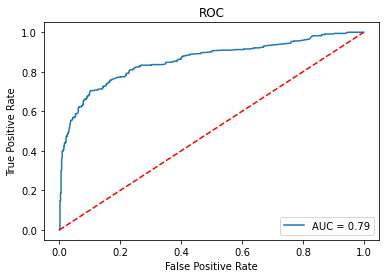

In [22]:
# threshold is the 
fpr, tpr, threshold = roc_curve(y_train, logreg.predict_proba(x_train)[:,1])
plt.figure()
plt.title('ROC')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()